# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [1]:
# load and install packages
install.packages("pls")
library(tidyverse)
library(ggplot2)
library(pls)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




In [2]:
# disable warning messages
options(warn = -1)

# stop rounding at 3 decimal points
options(digits = 3)

Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame. 

In [3]:
# Read in Original Data Frames
hcp <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44.csv')
head(hcp)

# make clean dataframe
hcp.filter <- hcp %>% select(Flanker_Unadj, ends_with("_Vol"))
head(hcp.filter)
nrow(hcp.filter) # 1206

# remove NAs
d1 <- drop_na(hcp.filter)
head(d1)
nrow(d1) # 1113
ncol(d1) # 57

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101,86.5,2,45.9,107.2,105.3,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,109,97.2,1,49.7,72.6,72.0,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101,86.5,0,38.6,71.7,71.8,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,109,98.0,2,52.6,114.0,113.6,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122,110.5,0,38.6,84.8,85.3,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122,111.4,0,38.6,123.8,123.3,1.80,0,1.80


,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_L_WM_Hypointens_Vol,FS_R_WM_Hypointens_Vol,FS_L_Non.WM_Hypointens_Vol,FS_R_Non.WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,122,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,130,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,0,0,0,0,325,800,409,569,522,813
3,113,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,0,0,0,0,195,1029,526,578,576,649
4,121,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,0,0,0,0,302,972,589,528,471,858
5,127,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,0,0,0,0,296,1065,618,838,729,1072
6,102,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,0,0,0,0,235,1057,591,538,430,849


[1] 1206

,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_L_WM_Hypointens_Vol,FS_R_WM_Hypointens_Vol,FS_L_Non.WM_Hypointens_Vol,FS_R_Non.WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,130,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,0,0,0,0,325,800,409,569,522,813
2,113,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,0,0,0,0,195,1029,526,578,576,649
3,121,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,0,0,0,0,302,972,589,528,471,858
4,127,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,0,0,0,0,296,1065,618,838,729,1072
5,102,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,0,0,0,0,235,1057,591,538,430,849
6,107,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,0,0,0,0,258,1033,494,487,489,992


[1] 1113

[1] 57

---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [4]:
# full dataframe correlation
# cor(d1)

# make FS_ dataframe
d1.FS <- d1 %>% select(starts_with("FS_"))
ncol(d1.FS) #56, looks good
cor(d1.FS)

# make variable
fs_cor <- cor(d1.FS)

[1] 56

,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,FS_R_WM_Vol,⋯,FS_L_WM_Hypointens_Vol,FS_R_WM_Hypointens_Vol,FS_L_Non.WM_Hypointens_Vol,FS_R_Non.WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
FS_IntraCranial_Vol,1.0000,0.8978,0.8400,0.8439,0.845,0.7885,0.8751,0.885,0.8311,0.8278,⋯,NA,NA,NA,NA,0.3310,0.3449,0.1896,0.19734,0.28460,0.4018
FS_BrainSeg_Vol,0.8978,1.0000,0.9448,0.9483,0.950,0.8690,0.9665,0.996,0.9503,0.9483,⋯,NA,NA,NA,NA,0.3501,0.3768,0.2724,0.27077,0.35348,0.4309
FS_LCort_GM_Vol,0.8400,0.9448,1.0000,0.9845,0.996,0.7898,0.9821,0.949,0.8282,0.8220,⋯,NA,NA,NA,NA,0.2735,0.2515,0.1962,0.20894,0.25730,0.3141
FS_RCort_GM_Vol,0.8439,0.9483,0.9845,1.0000,0.996,0.7926,0.9830,0.952,0.8331,0.8308,⋯,NA,NA,NA,NA,0.2834,0.2445,0.1918,0.21189,0.25900,0.3054
FS_TotCort_GM_Vol,0.8453,0.9503,0.9960,0.9962,1.000,0.7943,0.9864,0.954,0.8339,0.8297,⋯,NA,NA,NA,NA,0.2796,0.2489,0.1947,0.21125,0.25917,0.3109
FS_SubCort_GM_Vol,0.7885,0.8690,0.7898,0.7926,0.794,1.0000,0.8407,0.859,0.8248,0.8251,⋯,NA,NA,NA,NA,0.3281,0.3637,0.3169,0.27017,0.33210,0.4041
FS_Total_GM_Vol,0.8751,0.9665,0.9821,0.9830,0.986,0.8407,1.0000,0.957,0.8463,0.8427,⋯,NA,NA,NA,NA,0.3003,0.2651,0.2139,0.22783,0.27379,0.3269
FS_SupraTentorial_Vol,0.8852,0.9958,0.9486,0.9519,0.954,0.8591,0.9568,1.000,0.9566,0.9545,⋯,NA,NA,NA,NA,0.3430,0.3840,0.2739,0.26882,0.35689,0.4366
FS_L_WM_Vol,0.8311,0.9503,0.8282,0.8331,0.834,0.8248,0.8463,0.957,1.0000,0.9972,⋯,NA,NA,NA,NA,0.3598,0.4663,0.3707,0.35285,0.44578,0.5013
FS_R_WM_Vol,0.8278,0.9483,0.8220,0.8308,0.830,0.8251,0.8427,0.954,0.9972,1.0000,⋯,NA,NA,NA,NA,0.3644,0.4605,0.3677,0.35176,0.44142,0.4977


(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [5]:
# load and install reshape2 package
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [6]:
# melt cormat
melted_cormat <- melt(fs_cor, , na.rm = TRUE)
head(melted_cormat) # view new, melted fs_cor object

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,1.000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,0.898
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,0.840
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,0.844
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,0.845
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,0.789


In [7]:
# adjust plot size
options(repr.plot.width = 12, repr.plot.height = 12)

Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

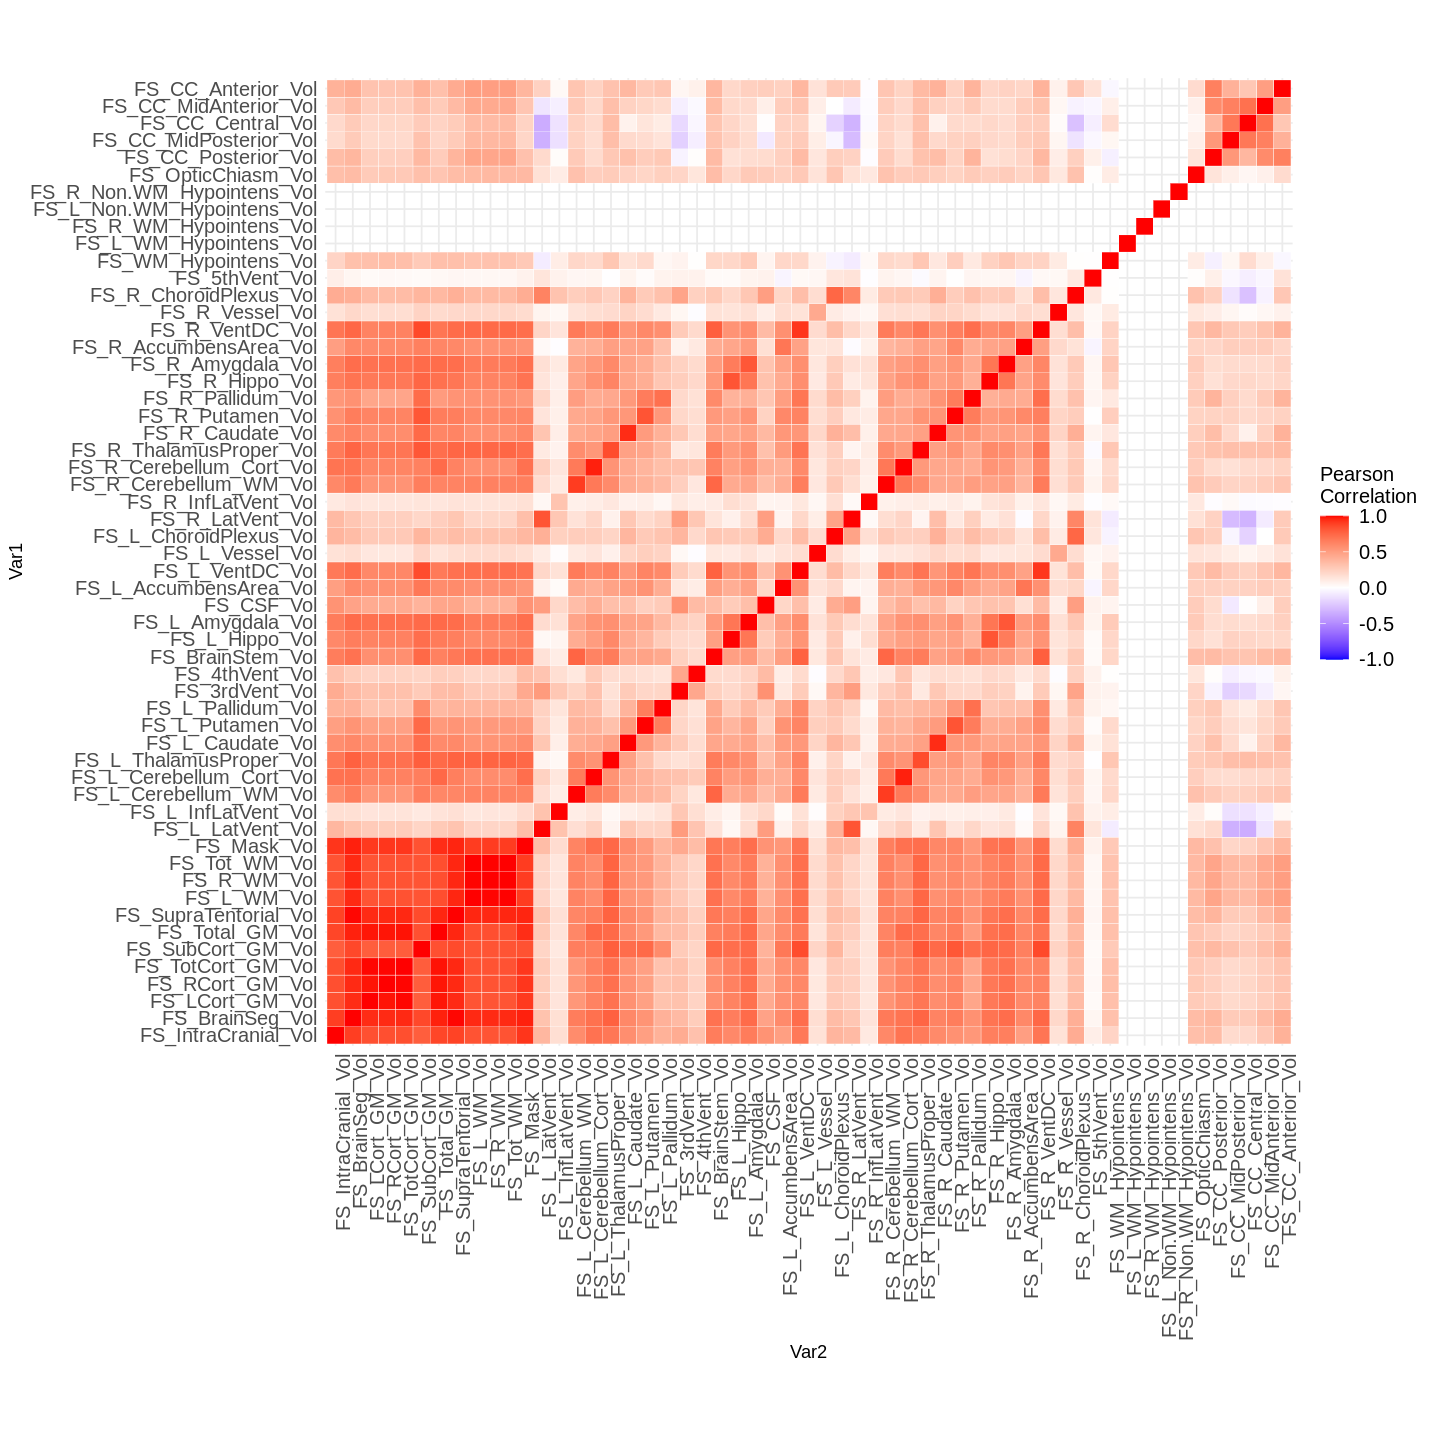

In [8]:
# plot heatmap, colors scaled between red (indicating high) and blue (indicating low),
  # values capped at/limited at -1 and +1
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value)) +
  geom_tile(color = "white") + 
  scale_fill_gradient2(low = "blue", high = "red", midpoint = 0, limit = c(-1,1), space = "Lab", name="Pearson\nCorrelation") + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 1, size = 12, hjust = 1)) + 
  theme(axis.text.y = element_text(size = 12)) +
  theme(legend.text = element_text(size = 12)) +
  theme(legend.title = element_text(size = 12)) +
  coord_fixed()
# full heatmap
# make dimensions bigger

What patterns do you see in the correlations?

> *We can see the variables are all pretty well positively correlated, especially in the bottom left square. There are very few small squares where there is a negative correlation found between variables. For the most part, there is a moderate to strong positive correlation between many of the variables.*


---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.


(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [9]:
fs_d.pca <- princomp(na.omit(d1.FS), cor. = TRUE)
fs_d.pca

Call:
princomp(x = na.omit(d1.FS), cor. = TRUE)

Standard deviations:
  Comp.1   Comp.2   Comp.3   Comp.4   Comp.5   Comp.6   Comp.7   Comp.8 
3.17e+05 6.58e+04 3.27e+04 3.15e+04 1.15e+04 6.67e+03 3.36e+03 3.24e+03 
  Comp.9  Comp.10  Comp.11  Comp.12  Comp.13  Comp.14  Comp.15  Comp.16 
2.28e+03 1.50e+03 1.30e+03 1.23e+03 1.12e+03 6.96e+02 6.12e+02 5.95e+02 
 Comp.17  Comp.18  Comp.19  Comp.20  Comp.21  Comp.22  Comp.23  Comp.24 
4.86e+02 4.45e+02 3.75e+02 3.51e+02 3.34e+02 3.08e+02 2.79e+02 2.21e+02 
 Comp.25  Comp.26  Comp.27  Comp.28  Comp.29  Comp.30  Comp.31  Comp.32 
1.89e+02 1.83e+02 1.77e+02 1.67e+02 1.61e+02 1.49e+02 1.43e+02 1.32e+02 
 Comp.33  Comp.34  Comp.35  Comp.36  Comp.37  Comp.38  Comp.39  Comp.40 
1.27e+02 1.14e+02 1.11e+02 1.06e+02 9.74e+01 9.42e+01 9.04e+01 8.53e+01 
 Comp.41  Comp.42  Comp.43  Comp.44  Comp.45  Comp.46  Comp.47  Comp.48 
7.97e+01 7.68e+01 5.53e+01 5.07e+01 4.78e+01 4.66e+01 4.46e+01 4.15e+01 
 Comp.49  Comp.50  Comp.51  Comp.52  Comp.53  Comp.54 

(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

In [10]:
# variance explained (like the tutorial)
var.exp = fs_d.pca$sdev/sum(fs_d.pca$sdev)

# but we want cummulative variance explained
# ?cumsum
cum.var.exp <- cumsum(fs_d.pca$sdev/sum(fs_d.pca$sdev))

In [11]:
# adjust plot size again
options(repr.plot.width = 8, repr.plot.height = 8)

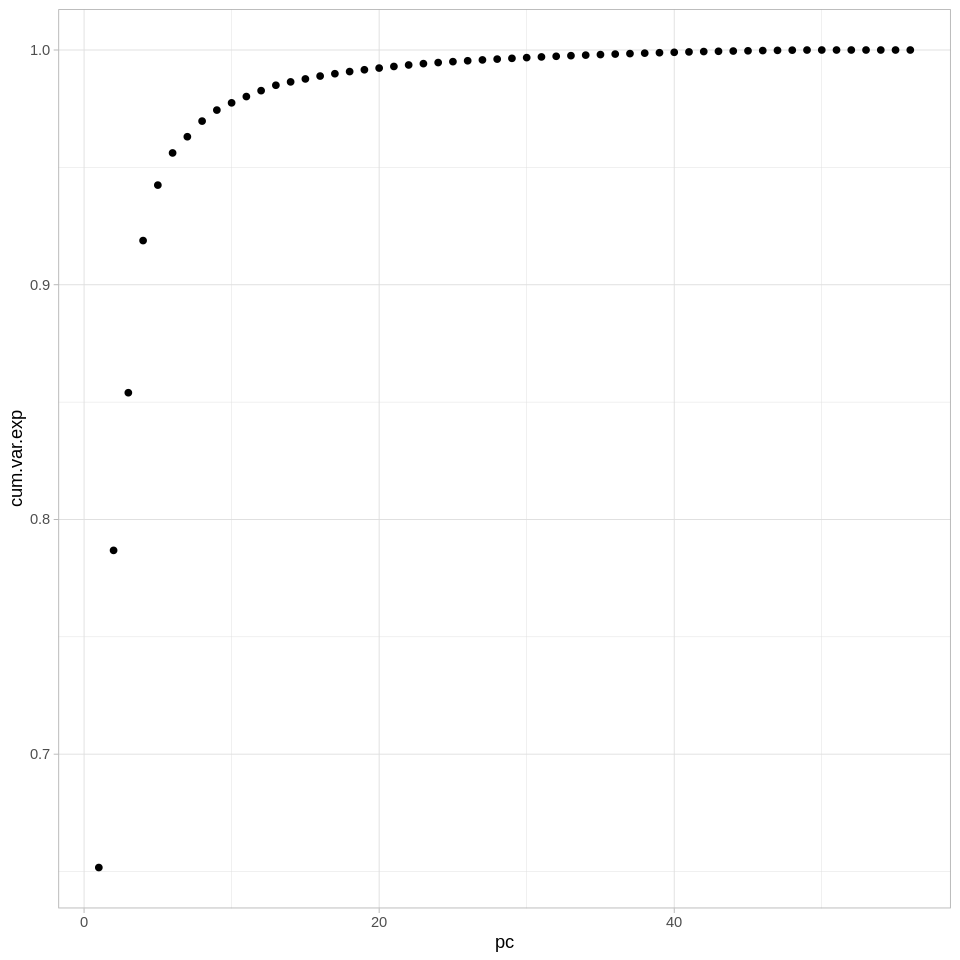

In [12]:
# plot results
ggplot(data.frame(pc=1:56, cum.var.exp)) +
    aes(x = pc,y = cum.var.exp) + 
    geom_point() + 
    theme_light()

(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function. 

In [13]:
# ?which
which(cum.var.exp > .95)

Comp.6  Comp.7  Comp.8  Comp.9 Comp.10 Comp.11 Comp.12 Comp.13 Comp.14 Comp.15 
      6       7       8       9      10      11      12      13      14      15 
Comp.16 Comp.17 Comp.18 Comp.19 Comp.20 Comp.21 Comp.22 Comp.23 Comp.24 Comp.25 
     16      17      18      19      20      21      22      23      24      25 
Comp.26 Comp.27 Comp.28 Comp.29 Comp.30 Comp.31 Comp.32 Comp.33 Comp.34 Comp.35 
     26      27      28      29      30      31      32      33      34      35 
Comp.36 Comp.37 Comp.38 Comp.39 Comp.40 Comp.41 Comp.42 Comp.43 Comp.44 Comp.45 
     36      37      38      39      40      41      42      43      44      45 
Comp.46 Comp.47 Comp.48 Comp.49 Comp.50 Comp.51 Comp.52 Comp.53 Comp.54 Comp.55 
     46      47      48      49      50      51      52      53      54      55 
Comp.56 
     56

What does this tell you about the underlying dimensionality of the brain volume measures? 

> *Once we hit six principle components, we can then explain at least 95% of the cummulitive variance.*


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [14]:
# set seed
set.seed(2)

# drop 0s from dataframe
df <- d1[, colSums(d1 != 0) > 0]
head(df)

,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,130,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,80,1613,0,1269,325,800,409,569,522,813
2,113,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,70,1007,0,1155,195,1029,526,578,576,649
3,121,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,88,1303,0,1279,302,972,589,528,471,858
4,127,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,81,909,0,1154,296,1065,618,838,729,1072
5,102,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,75,1215,3,377,235,1057,591,538,430,849
6,107,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,93,1331,17,554,258,1033,494,487,489,992


In [15]:
pcr.fit = pcr(Flanker_Unadj~., data = df,scale = TRUE, validation ="CV")
summary(pcr.fit)

Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.925    9.924    9.933    9.922    9.924    9.912
adjCV        10.08    9.924    9.923    9.932    9.920    9.922    9.910
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.889    9.891    9.893     9.896     9.909     9.918     9.934
adjCV    9.886    9.887    9.890     9.892     9.904     9.913     9.927
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.941     9.945     9.934     9.899     9.896     9.907     9.914
adjCV     9.934     9.939     9.928     9.889     9.886     9.897     9.903
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.922     9.930     9.939     9.955     9.968     9.971     9.979
adjCV     9.911  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

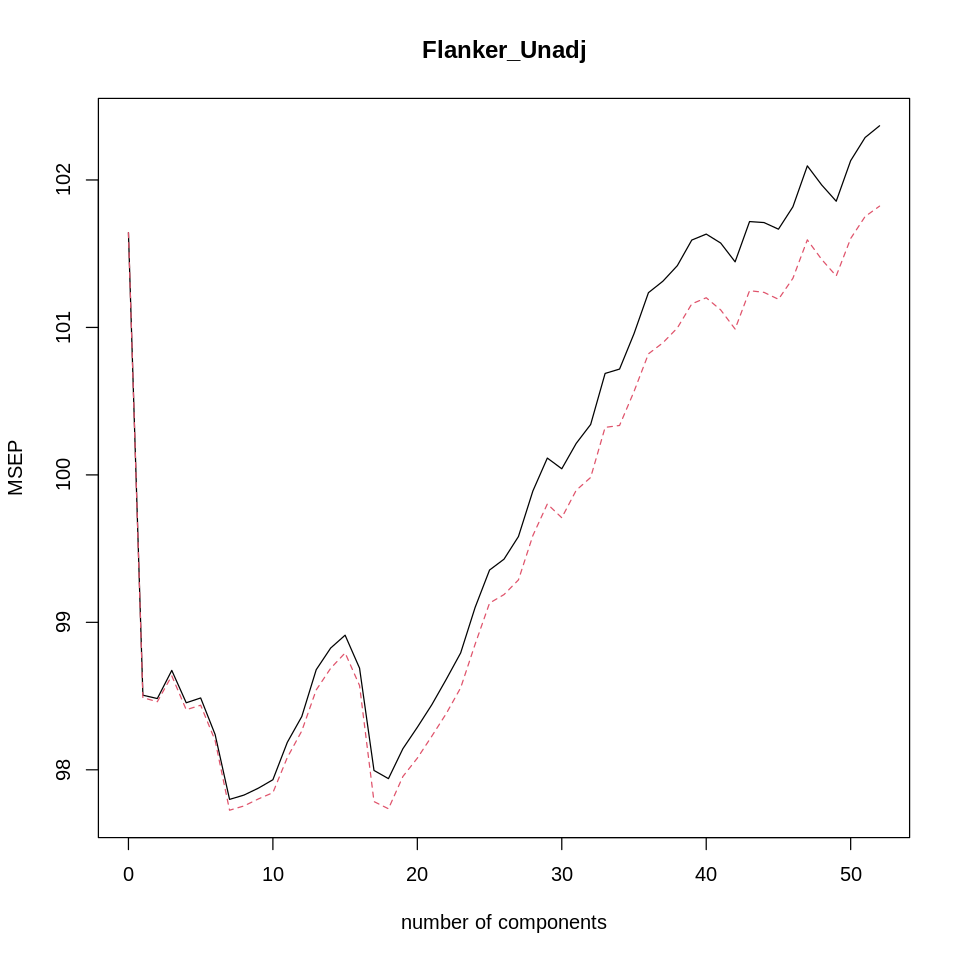

In [16]:
validationplot(pcr.fit,val.type = "MSEP") # MSEP shows cross-validated mean-squared error as error metric. 

(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [17]:
# Think about the structure of your msep object and how to reference certain parts of R objects.

msep <- MSEP(pcr.fit, estimate = "CV")
# msep # yep stuff is showing up
dim(msep) # null, vector object, not a matrix

NULL

In [20]:
msep_val <- drop(msep$val)
summary(msep_val)
min(msep_val)  # yep it matches, minimum value of 97.8
which(msep_val == min(msep_val))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   97.8    98.5    99.6    99.9   101.6   102.4 

[1] 97.8

7 comps 
      8

What what does this plot tell you about how many components best explain variance in Flanker task performance? 

> *The plot is telling me that 8 components best explain the variance in Flanker test performance. This makes sense in the plot as well as what I found in the code above.* 

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> *For the number of components to explain variance in X alone (the brain volumes), 6 components provided the best explaination. For the number of components to best explain performance in the Flanker test, 8 components provides the best explaination. Since performance on the Flanker test prefers 8 components, this is telling us that it's more complex than just the brain volumnes. We need more componenents for Flanker test performance in order to retain the patterns and trends in the data, compared to brain volumes.* 

> 

**DUE:** 5pm EST, April 17, 2023, extension until April 20th

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *N/A*